In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection as RP
from sklearn.feature_selection import SelectKBest, f_classif,SelectPercentile
from scipy.linalg import pinv
from scipy.stats import kurtosis
from scipy import sparse 
from sklearn import metrics
from sklearn.metrics import silhouette_score as sil_score
from sklearn.preprocessing import scale, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import normalize
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, silhouette_score, homogeneity_score, adjusted_mutual_info_score
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine
wine = load_wine()
breast_cancer = load_breast_cancer()

In [106]:
wine_x = scale(wine.data)
wine_y = wine.target

bc_x = scale(breast_cancer.data)
bc_y = breast_cancer.target

wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
#get best k

def kmeans_plot(data):
    sse = []
    for i in range(2,10):
        kmeans = KMeans(n_clusters=i,init='k-means++', random_state=0)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    plt.plot(range(2,10),sse,'-o')
    plt.title("Elbow method-breast cancer")
    plt.xlabel('clusters')
    plt.ylabel('SSE')
    
    
    plt.show()
            
            



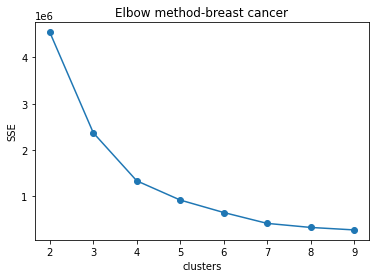

In [5]:
kmeans_plot(wine_x)

In [11]:
kmeans = KMeans(n_clusters=3,init='k-means++', random_state=0)
kmeans.fit(wine_x)
a = pd.DataFrame(kmeans.labels_)
b = pd.DataFrame(wine_y)
a[a[0]==1] = 3
a[a[0]==0] = 5
a[a[0]==2] = 4
a = a-3
accuracy_score(a,b)

0.702247191011236

In [7]:
kmeans = KMeans(n_clusters=2,init='k-means++', random_state=0)
kmeans.fit(bc_x)
a = pd.DataFrame(kmeans.labels_)
b = pd.DataFrame(bc_y)
a[a[0]==1] = 2
a[a[0]==0] = 3
a = a-2
accuracy_score(a,b)

0.8541300527240774

Text(0, 0.5, 'acid')

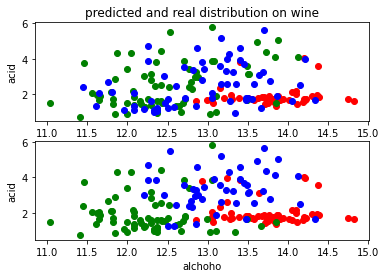

In [20]:
pd1 = pd.DataFrame(wine_x)
pd1['result'] = a
pd00 = pd1[pd1['result']==0]
pd01 = pd1[pd1['result']==1]
pd02 = pd1[pd1['result']==2]
l1 = 0
l2 = 1

plt.subplot(211)
plt.scatter(pd00[l1],pd00[l2], color='r')
plt.scatter(pd01[l1],pd01[l2], color='g')
plt.scatter(pd02[l1],pd02[l2], color='b')
plt.title("predicted and real distribution on wine")
plt.xlabel("alchoho")
plt.ylabel("acid")

plt.subplot(212)
pd1 = pd.DataFrame(wine_x)
pd1['result'] = b
pd00 = pd1[pd1['result']==0]
pd01 = pd1[pd1['result']==1]
pd02 = pd1[pd1['result']==2]

l1 = 0
l2 = 1
plt.scatter(pd00[l1],pd00[l2], color='r')
plt.scatter(pd01[l1],pd01[l2], color='g')
plt.scatter(pd02[l1],pd02[l2], color='b')
plt.xlabel("alchoho")
plt.ylabel("acid")

Text(0, 0.5, 'acid')

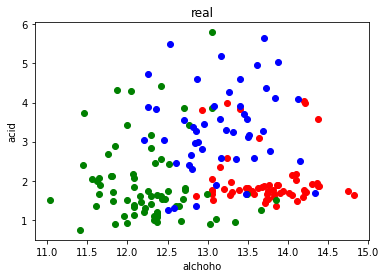

In [57]:
bc_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

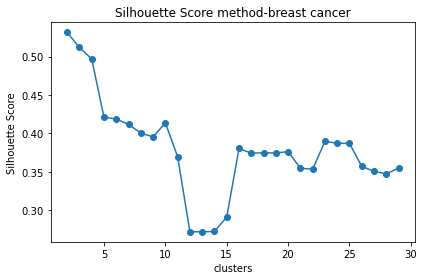

In [45]:
# expectation maximization plot showing bic and silhouette score
def em_plot(data):
    scores = []
    for i in range(2,30):
        gmm = GaussianMixture(n_components=i, random_state=0)
        gmm.fit(data)
        gmm_labels = gmm.predict(data)
        scores.append(sil_score(data, gmm_labels))
                

    plt.plot(range(2, 30),scores,'-o')
    plt.title("Silhouette Score method-breast cancer")
    plt.xlabel('clusters')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()
    plt.show()
em_plot(bc_x)

In [23]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(wine_x)
gmm_labels = gmm.predict(wine_x)
a = pd.DataFrame(gmm_labels)
b = pd.DataFrame(wine_y)
a[a[0]==1] = 3
a[a[0]==0] = 5
a[a[0]==2] = 4
a = a-3
accuracy_score(a,b)

0.848314606741573

In [24]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(bc_x)
gmm_labels = gmm.predict(bc_x)
a = pd.DataFrame(gmm_labels)
b = pd.DataFrame(bc_y)
a[a[0]==1] = 2
a[a[0]==0] = 3
a = a-2
accuracy_score(a,b)

0.9332161687170475

In [52]:
pca = PCA(n_components=0.99)
pca.fit(wine_x)

print( pca.explained_variance_ratio_)
print (pca.n_components_)

[0.99809123]
1


In [30]:
pca = PCA(n_components=13)
pca.fit(wine_x)
print(pca.explained_variance_ratio_)

 [9.98091230e-01 1.73591562e-03 9.49589576e-05 5.02173562e-05
 1.23636847e-05 8.46213034e-06 2.80681456e-06 1.52308053e-06
 1.12783044e-06 7.21415811e-07 3.78060267e-07 2.12013755e-07
 8.25392788e-08]


In [51]:
pca = PCA(n_components=0.99)
pca.fit(bc_x)

print( pca.explained_variance_ratio_)
print (pca.n_components_)

[0.98204467 0.01617649]
2


In [46]:
pca = PCA(n_components=30)
pca.fit(bc_x)
print(pca.explained_variance_ratio_)

[9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05 6.64883951e-06 4.01713682e-06 8.22017197e-07
 3.44135279e-07 1.86018721e-07 6.99473205e-08 1.65908880e-08
 6.99641650e-09 4.78318306e-09 2.93549214e-09 1.41684927e-09
 8.29577731e-10 5.20405883e-10 4.08463983e-10 3.63313378e-10
 1.72849737e-10 1.27487508e-10 7.72682973e-11 6.28357718e-11
 3.57302295e-11 2.76396041e-11 8.14452259e-12 6.30211541e-12
 4.43666945e-12 1.55344680e-12]


In [50]:
pca.components_

array([[ 5.08623202e-03,  2.19657026e-03,  3.50763298e-02,
         5.16826469e-01,  4.23694535e-06,  4.05260047e-05,
         8.19399539e-05,  4.77807775e-05,  7.07804332e-06,
        -2.62155251e-06,  3.13742507e-04, -6.50984008e-05,
         2.23634150e-03,  5.57271669e-02, -8.05646029e-07,
         5.51918197e-06,  8.87094462e-06,  3.27915009e-06,
        -1.24101836e-06, -8.54530832e-08,  7.15473257e-03,
         3.06736622e-03,  4.94576447e-02,  8.52063392e-01,
         6.42005481e-06,  1.01275937e-04,  1.68928625e-04,
         7.36658178e-05,  1.78986262e-05,  1.61356159e-06]])

D:\myAnaconda\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
D:\myAnaconda\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
D:\myAnaconda\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
D:\myAnaconda\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
D:\m

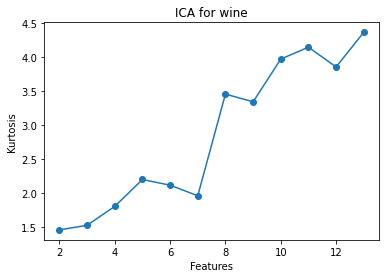

13

In [57]:
def calc_ica_components(data, dataName):

    dimensions = data.shape[1]+1
    kurtosis = []
    for dim in range(2,dimensions):
        ica = FastICA(n_components=dim, max_iter=600)
        res = ica.fit_transform(data)
        tmp = pd.DataFrame(res)
        k   = tmp.kurt(axis=0)
        kurtosis.append(k.abs().mean())
        
    
    optimalComponents = np.argmax(kurtosis)
    
    plt.title('ICA for %s' % dataName)
    plt.ylabel('Kurtosis')
    plt.xlabel('Features')
    plt.plot(range(2,dimensions), kurtosis,'-o')

    plt.show()
    

    return optimalComponents+2
calc_ica_components(wine_x,'wine')

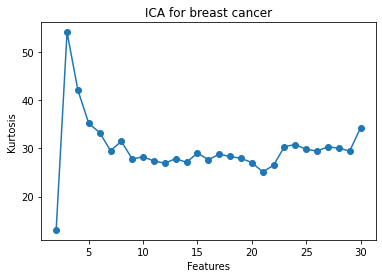

3

In [58]:
calc_ica_components(bc_x,'breast cancer')

In [63]:
rp = RP(n_components=2)
xp = rp.fit_transform(wine_x)
xp

array([[ -910.95780971,  -396.75361882],
       [ -891.98411654,  -330.17651691],
       [ -998.1551947 ,  -344.85628428],
       [-1246.33586942,  -400.11867307],
       [ -633.76204446,  -348.37819241],
       [-1222.53151997,  -393.24108711],
       [-1085.6114658 ,  -341.60002293],
       [-1100.5945966 ,  -400.61687131],
       [ -881.74165917,  -324.59245027],
       [ -881.48288951,  -329.71564573],
       [-1268.68555636,  -380.4170929 ],
       [-1076.52470695,  -338.00158059],
       [-1106.85479203,  -327.69826082],
       [ -965.49491726,  -318.03722048],
       [-1297.81182249,  -377.92016284],
       [-1107.10996278,  -383.30360291],
       [-1083.77697664,  -398.23018905],
       [ -957.35592305,  -375.07243056],
       [-1409.44169139,  -404.53419555],
       [ -726.19306447,  -353.28859415],
       [ -674.16974787,  -372.23440812],
       [ -657.67032517,  -314.20317823],
       [ -877.6386774 ,  -331.20621706],
       [ -859.25344231,  -315.60416171],
       [ -717.34

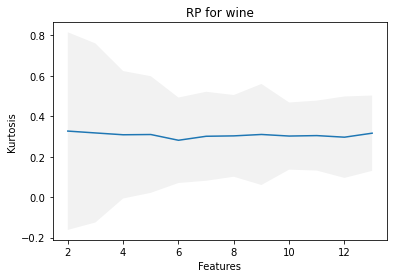

In [80]:
def calc_rp_components(data, dataName, tries=100):
    t0 = time()
    
    dimensions = data.shape[1]+1
    kurtosis = []
    stddev_kurtosis = []
    lowerbound = []
    upperbound = []
    for dim in range(2,dimensions):
        kurts = []
        for t in range(tries):
            rp = RP(n_components=dim)
            res = rp.fit_transform(data)
            tmp = pd.DataFrame(res)
            k   = tmp.kurt(axis=0)
            kurts.append(k.abs().mean())
        kurtosis.append(np.mean(kurts))
        lowerbound.append(np.mean(kurts)-2*np.std(kurts))
        upperbound.append(np.mean(kurts)+2*np.std(kurts))
        
    optimalComponents = np.argmax(kurtosis)
    
    end = time() - t0
    
    plt.title('RP for %s' % (dataName))
    plt.ylabel('Kurtosis')
    plt.xlabel('Features')
    plt.plot(range(2,dimensions), kurtosis)
    plt.fill_between(range(2, dimensions), lowerbound, upperbound, facecolor='gray', alpha=0.1)

    plt.show()



calc_rp_components(wine_x,'wine')

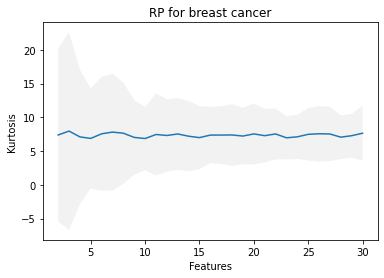

In [81]:
calc_rp_components(bc_x,'breast cancer')

<BarContainer object of 13 artists>

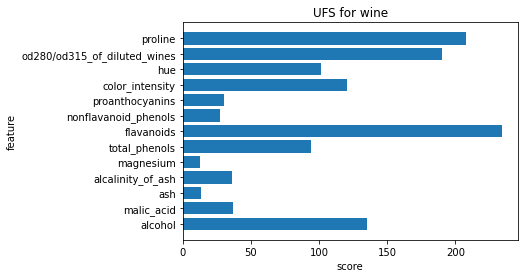

In [103]:
sp=SelectPercentile(f_classif, percentile= 50)
x_result = sp.fit_transform(wine_x, wine_y)
sp.get_support()
plt.title("UFS for wine")
plt.ylabel("feature")
plt.xlabel("score")
plt.barh(wine.feature_names,sp.scores_)

<BarContainer object of 30 artists>

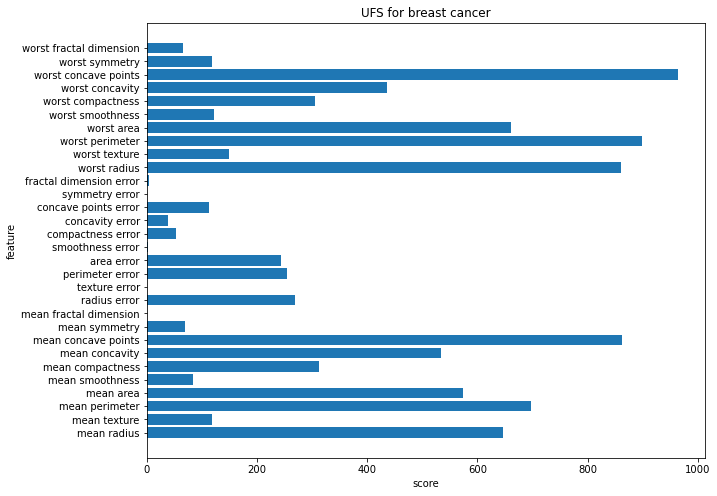

In [107]:
sp=SelectPercentile(f_classif, percentile= 50)
x_result = sp.fit_transform(bc_x, bc_y)
sp.get_support()
plt.figure(figsize=(10, 8))
plt.title("UFS for breast cancer")
plt.ylabel("feature")
plt.xlabel("score")
plt.barh(breast_cancer.feature_names,sp.scores_)

In [155]:

winePCA = PCA(n_components=0.99, random_state=0).fit_transform(wine_x)
wineICA = FastICA(n_components=8, random_state=0).fit_transform(wine_x)
wineRP  = RP(n_components=6, random_state=0).fit_transform(wine_x)
wineUFS = SelectKBest(f_classif, k=6).fit_transform(wine_x, wine_y)



D:\myAnaconda\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


In [133]:
bcPCA = PCA(n_components=0.99, random_state=0).fit_transform(bc_x)
bcICA = FastICA(n_components=3, random_state=0).fit_transform(bc_x)
bcRP  = RP(n_components=10, random_state=0).fit_transform(bc_x)
bcUFS = SelectKBest(f_classif, k=20).fit_transform(bc_x, bc_y)

In [164]:
kmeans = KMeans(n_clusters=2,init='k-means++', random_state=0)
kmeans.fit(bc_x)
a = pd.DataFrame(kmeans.labels_)
b = pd.DataFrame(bc_y)
a[a[0]==1] = 2
a[a[0]==0] = 3
a = a-2
accuracy_score(a,b)

0.9050966608084359

In [165]:
kmeans = KMeans(n_clusters=2,init='k-means++', random_state=0)
kmeans.fit(bcPCA)
a = pd.DataFrame(kmeans.labels_)
b = pd.DataFrame(bc_y)
# a[a[0]==1] = 2
# a[a[0]==0] = 3
# a = a-2
accuracy_score(a,b)

0.9050966608084359

In [130]:
kmeans = KMeans(n_clusters=2,init='k-means++', random_state=0)
kmeans.fit(bcICA)
a = pd.DataFrame(kmeans.labels_)
b = pd.DataFrame(bc_y)
a[a[0]==1] = 2
a[a[0]==0] = 3
a = a-2
accuracy_score(a,b)

0.929701230228471

In [131]:
kmeans = KMeans(n_clusters=2,init='k-means++', random_state=0)
kmeans.fit(bcRP)
a = pd.DataFrame(kmeans.labels_)
b = pd.DataFrame(bc_y)
a[a[0]==1] = 2
a[a[0]==0] = 3
a = a-2
accuracy_score(a,b)

0.9138840070298769

In [134]:
kmeans = KMeans(n_clusters=2,init='k-means++', random_state=0)
kmeans.fit(bcUFS)
a = pd.DataFrame(kmeans.labels_)
b = pd.DataFrame(bc_y)
a[a[0]==1] = 2
a[a[0]==0] = 3
a = a-2
accuracy_score(a,b)

0.929701230228471

In [209]:
kmeans = KMeans(n_clusters=3,init='k-means++', random_state=0)
kmeans.fit(wine_x)
a = pd.DataFrame(kmeans.labels_)
b = pd.DataFrame(wine_y)
a[a[0]==0] = 5
a[a[0]==1] = 4
a[a[0]==2] = 3
a = a-3
accuracy_score(a,b)

0.9719101123595506

In [210]:
kmeans = KMeans(n_clusters=3,init='k-means++', random_state=0)
kmeans.fit(winePCA)
a = pd.DataFrame(kmeans.labels_)
b = pd.DataFrame(wine_y)
a[a[0]==0] = 5
a[a[0]==1] = 4
a[a[0]==2] = 3
a = a-3
accuracy_score(a,b)

0.9662921348314607

In [211]:
kmeans = KMeans(n_clusters=3,init='k-means++', random_state=0)
kmeans.fit(wineICA)
a = pd.DataFrame(kmeans.labels_)
b = pd.DataFrame(wine_y)
a[a[0]==0] = 3
a[a[0]==1] = 4
a[a[0]==2] = 5
a = a-3
accuracy_score(a,b)

0.9662921348314607

In [212]:
kmeans = KMeans(n_clusters=3,init='k-means++', random_state=0)
kmeans.fit(wineRP)
a = pd.DataFrame(kmeans.labels_)
b = pd.DataFrame(wine_y)
a[a[0]==0] = 5
a[a[0]==1] = 3
a[a[0]==2] = 4
a = a-3
accuracy_score(a,b)

0.6910112359550562

In [213]:
kmeans = KMeans(n_clusters=3,init='k-means++', random_state=0)
kmeans.fit(wineUFS)
a = pd.DataFrame(kmeans.labels_)
b = pd.DataFrame(wine_y)
a[a[0]==0] = 3
a[a[0]==1] = 5
a[a[0]==2] = 4
a = a-3
accuracy_score(a,b)

0.9550561797752809

In [169]:
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(bc_x)
gmm_labels = gmm.predict(bc_x)
a = pd.DataFrame(gmm_labels)
b = pd.DataFrame(bc_y)
a[a[0]==1] = 2
a[a[0]==0] = 3
a = a-2
accuracy_score(a,b)

0.9402460456942003

In [173]:
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(bcPCA)
gmm_labels = gmm.predict(bcPCA)
a = pd.DataFrame(gmm_labels)
b = pd.DataFrame(bc_y)
a[a[0]==1] = 2
a[a[0]==0] = 3
a = a-2
accuracy_score(a,b)

0.8558875219683656

In [175]:
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(bcICA)
gmm_labels = gmm.predict(bcICA)
a = pd.DataFrame(gmm_labels)
b = pd.DataFrame(bc_y)
a[a[0]==1] = 2
a[a[0]==0] = 3
a = a-2
accuracy_score(a,b)

0.8927943760984183

In [176]:
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(bcRP)
gmm_labels = gmm.predict(bcRP)
a = pd.DataFrame(gmm_labels)
b = pd.DataFrame(bc_y)
a[a[0]==1] = 2
a[a[0]==0] = 3
a = a-2
accuracy_score(a,b)

0.7697715289982425

In [177]:
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(bcUFS)
gmm_labels = gmm.predict(bcUFS)
a = pd.DataFrame(gmm_labels)
b = pd.DataFrame(bc_y)
a[a[0]==1] = 2
a[a[0]==0] = 3
a = a-2
accuracy_score(a,b)

0.9420035149384886

In [180]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(wine_x)
gmm_labels = gmm.predict(wine_x)
a = pd.DataFrame(gmm_labels)
b = pd.DataFrame(wine_y)
a[a[0]==0] = 5
a[a[0]==1] = 4
a[a[0]==2] = 3
a = a-3
accuracy_score(a,b)

0.9606741573033708

In [181]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(winePCA)
gmm_labels = gmm.predict(winePCA)
a = pd.DataFrame(gmm_labels)
b = pd.DataFrame(wine_y)
a[a[0]==0] = 5
a[a[0]==1] = 4
a[a[0]==2] = 3
a = a-3
accuracy_score(a,b)

0.9662921348314607

In [182]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(wineICA)
gmm_labels = gmm.predict(wineICA)
a = pd.DataFrame(gmm_labels)
b = pd.DataFrame(wine_y)
a[a[0]==0] = 5
a[a[0]==1] = 4
a[a[0]==2] = 3
a = a-3
accuracy_score(a,b)

0.7696629213483146

In [186]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(wineRP)
gmm_labels = gmm.predict(wineRP)
a = pd.DataFrame(gmm_labels)
b = pd.DataFrame(wine_y)
a[a[0]==0] = 5
a[a[0]==1] = 3
a[a[0]==2] = 4
a = a-3
accuracy_score(a,b)

0.8202247191011236

In [189]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(wineUFS)
gmm_labels = gmm.predict(wineUFS)
a = pd.DataFrame(gmm_labels)
b = pd.DataFrame(wine_y)
a[a[0]==0] = 5
a[a[0]==1] = 4
a[a[0]==2] = 3
a = a-3
accuracy_score(a,b)

0.9662921348314607

In [190]:
def plot_learning_curve(clf, X, y, title='Learning Curve'):
    train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
                                                        clf, 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 20),
                                                        return_times = True,
                                                        random_state = 0)

    # ------------------------------------------------------------------------------------------
    # Plot Learning Curve
    # ------------------------------------------------------------------------------------------
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.figure(1)
    plt.plot(train_sizes, train_mean, '--', label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', label="Cross-validation score")
    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

    # Create learning curve plot
    plt.title(title)
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.grid()
    plt.show()
    
    # ------------------------------------------------------------------------------------------
    # Plot Scalability Curve
    # ------------------------------------------------------------------------------------------
    # Create mean and std of training times
    train_times_mean = np.mean(fit_times, axis=1)
    train_times_std  = np.std(fit_times, axis=1)
    
    # plot lines
    plt.figure(2)
    plt.plot(train_sizes, train_times_mean, 'o-')
    plt.fill_between(train_sizes, train_times_mean - train_times_std, train_times_mean + train_times_std, color='#DDDDDD')
    plt.title('Training Scalability')
    plt.xlabel('Training Set Size')
    plt.ylabel('Fit Times (s)')
    plt.grid()
    plt.show()

Original


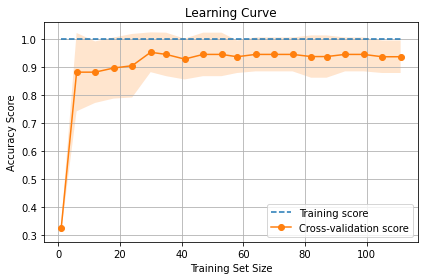

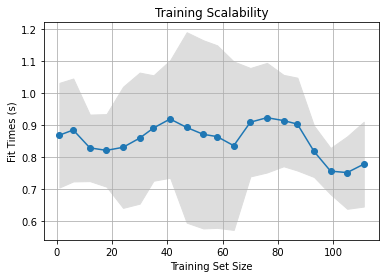

PCA


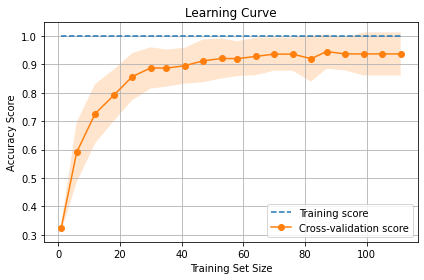

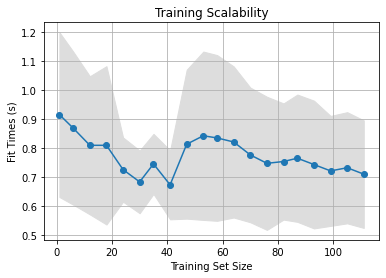

ICA


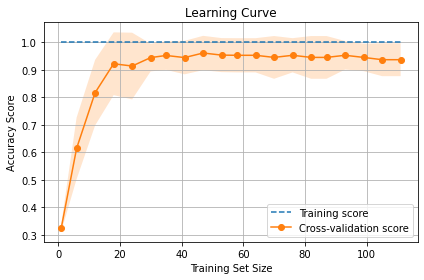

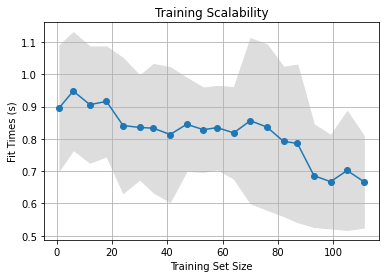

RP


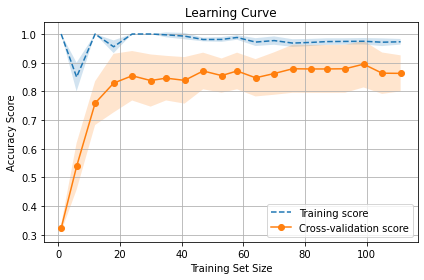

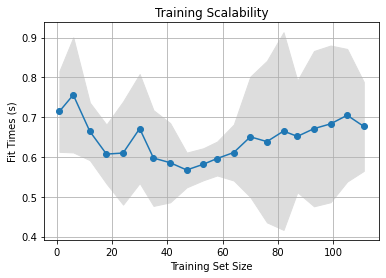

UFS


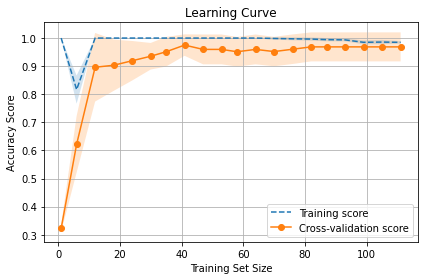

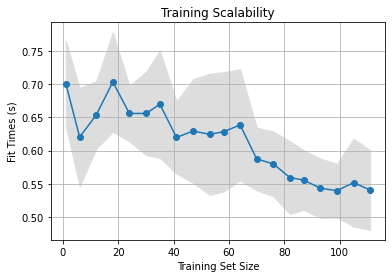

In [196]:
wine_data = []
wine_data.append(['Original', wine_x])
wine_data.append(['PCA', winePCA])
wine_data.append(['ICA', wineICA])
wine_data.append(['RP',  wineRP])
wine_data.append(['UFS', wineUFS])

test_size=0.3
for d in wine_data:
    dataName = d[0]
    print(dataName)
    
    X = d[1]
    y = wine_y
    
    # Scale the data
    X = scale(X)
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    

    
    # Create NN with best parameters from grid search
    nn = MLPClassifier(
                       hidden_layer_sizes=(10,10),
                       max_iter=1000,
                       alpha=1,
                       random_state=0)
    plot_learning_curve(nn, X_train, y_train)

In [226]:
kmeans = KMeans(n_clusters=4,init='k-means++', random_state=0)
wineMean = kmeans.fit_transform(wine_x)
gmm = GaussianMixture(n_components=4, random_state=0)
gmm.fit(wine_x)
wineEM = gmm.predict_proba(wine_x)

k-mean


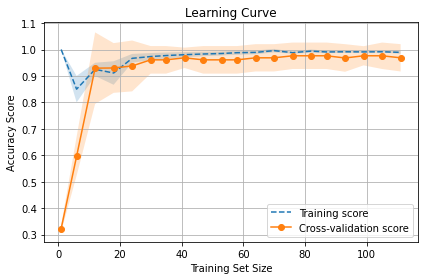

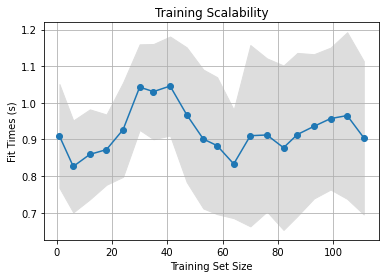

EM


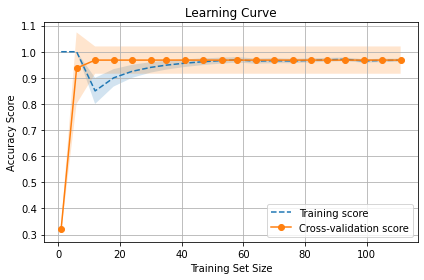

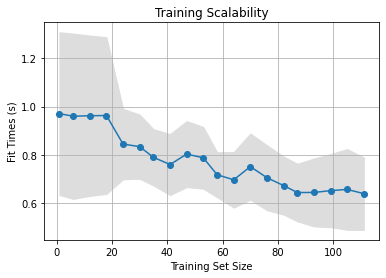

In [227]:
wine_data = []
wine_data.append(['k-mean', wineMean])
wine_data.append(['EM', wineEM])

for d in wine_data:
    dataName = d[0]
    print(dataName)
    X = d[1]
    y = wine_y
    X = scale(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    
    nn = MLPClassifier(
                       hidden_layer_sizes=(10,10),
                       max_iter=1000,
                       alpha=1,
                       random_state=0)
    plot_learning_curve(nn, X_train, y_train)